![Image of WordClod Antonio Fernández Troyano](https://i.ibb.co/9wL1jCM/Wordcloud-header.png)

- **Ejemplo de extracción de texto de varias páginas webs (web scraping), tratamiento de texto (nltk) y utilización de WordCloud.**

- **Artículo completo en Medium.com**
- https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

**Antonio Fernández Troyano**

# 0. Librerías

In [1]:
#Librerías básicas utiliadas
import numpy as np
import pandas as pd

#Librerías necesarias para scrapear textos de páginas web
import requests
from bs4 import BeautifulSoup

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librerías necesarias para la limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

# 1. Obtención de textos de páginas web temáticas

Aunque resulta evidente, cuando uno quiere generar una nube de palabras, necesitamos un texto que contenga palabras relacionadas con una tema en particular.

Por ejemplo, si queremos generar una nube de palabras relacionadas con el big data, necesitaremos textos que hablen sobre el big data.

Una vez que tengamos el texto y limpiemos el mismo de ciertos caractéres y palabras innecesarias (puntuación, pronombres, artículos, etc) a través de la librería WordCloud, podemos plotear aquellas palabras con mayor frecuencia más grandes.

In [2]:
def get_texto_url(list_webs):

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36",
                   "Accept-Encoding": "*", "Connection": "keep-alive"
            }

    texto =" "
    long=0
    for url in webs:

        try:
            web = requests.get(url, headers=headers)

            soup = BeautifulSoup(web.text)

            parrafos = soup.find_all('p')

            for p in parrafos:
                long += len(p.text)
                texto += " "+ str(p.text)

        except:
            print("Error en la url {}, response {}".format(url,web))
    
    print("Se han añadido un total de {} caractéres a la variable texto".format(long))
    return texto

## 1.1. Texto en "bruto"

In [3]:
webs = ["https://es.wikipedia.org/wiki/An%C3%A1lisis_de_datos",
        "https://es.wikipedia.org/wiki/Macrodatos",
        "https://www.iebschool.com/blog/tendencias-big-data/",
       "https://ubiqum.com/es/blog/analisis-de-datos-la-nueva-forma-de-comunicacion/",
       "https://www.powerdata.es/big-data",
       "https://www.datahack.es/big-data-data-science-data-mining/",
        "https://www.datahack.es/analisis-de-datos/",
        "https://www.datahack.es/analizando-datos-python/",
       "https://www.marketing-analitico.com/analitica-web/proceso-analisis-datos/",
       "https://luca-d3.com/es/data-speaks/diccionario-tecnologico"]

texto = get_texto_url(webs)

Se han añadido un total de 183604 caractéres a la variable texto


In [23]:
texto[:900]

'  El análisis de datos es un proceso que consiste en inspeccionar,[1]\u200b limpiar y  transformar  datos con el objetivo de resaltar información útil, para sugerir conclusiones y apoyo en la toma de decisiones. El análisis de datos tiene múltiples facetas y enfoques, que abarca diversas técnicas en una variedad de nombres, en diferentes negocios, la ciencia, y los dominios de las ciencias sociales. Los datos se coleccionan y analizan para indagar en cuestiones, probar conjeturas o probar la invalidez de teorías.[2]\u200b \n La minería de datos es una técnica específica que se enfoca en ir modelando y descubriendo conocimiento por propósitos predictivos en lugar de obtenerlo por propósitos descriptivos, mientras que la inteligencia empresarial incluye análisis de datos que se apoyan en agregación, con el enfoque en información empresarial.[3]\u200b\n El estadístico John Tukey definió el análisis de datos'

## 1.2. Limpieza del texto "bruto"

Tal y como podemos observar, hemos obtenido más de 100.000 caractéres de diferentes páginas web. ¿Qué problema tenemos ahora? pues que en el texto encontramos un montón de caractéres, signos de puntuación y palabras que NO nos interesan.

Este proceso es "iterativo" y depende de las fuentes que hayamos escogido. En algunos casos tendremos solo sígnos de puntuación. En otros más complejos tendremos saltos de línea, emoticonos y urls....


Podríamos realizar la limpieza del texto utilizado expresiones regulares REGEX, a mi parecer, IMPRESCINDIBLES. Sin embargo, es cierto que de primeras son bastante complejas por eso vamos a utilizar otra aproximación para la eliminación de esos caractéres que no queremos.

In [5]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [6]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Ahora que ya tenemos el listado de signos de puntuación y de stop_words, reemplazamos en el texto:

In [7]:
#Reemplazamos signos de puntuación por "":
for p in punctuation:
    clean_texto = texto.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [24]:
clean_texto[:900]

'análisis datos proceso consiste inspeccionar1\u200b limpiar transformar datos objetivo resaltar información útil sugerir conclusiones apoyo toma decisiones análisis datos múltiples facetas enfoques abarca diversas técnicas variedad nombres diferentes negocios ciencia dominios ciencias sociales datos coleccionan analizan indagar cuestiones probar conjeturas probar invalidez teorías2\u200b minería datos técnica específica enfoca ir modelando descubriendo conocimiento propósitos predictivos lugar obtenerlo propósitos descriptivos mientras inteligencia empresarial incluye análisis datos apoyan agregación enfoque información empresarial3\u200b estadístico john tukey definió análisis datos 1961 manera procedimientos analizar datos técnicas interpretar resultados dichos procedimientos formas planear recolección datos análisis fácil preciso exacto 4\u200b análisis datos estudio estructura grandes conjuntos moderno '

## 1.3. Análisis de las palabras del texto

Creamos un diccionario con las palabras y la frequencia de cada una. Posteriormente creamos un DF para ordenarlo y graficarlo:

In [9]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [10]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [11]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
datos,588
data,211
big,164
análisis,119
información,101
proceso,50
ejemplo,49
empresas,49
grandes,46
aprendizaje,42


In [12]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

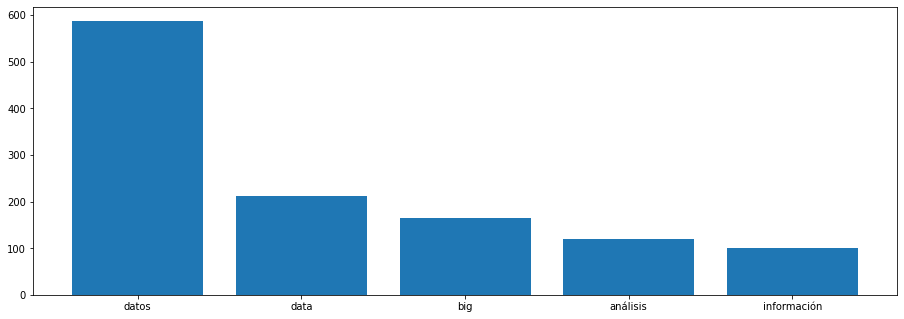

In [13]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

# 2. ¡Word cloud o nube de palabras!

## 2.1. Word cloud sencillo

Caso sencillo de uso de la librería WordCloud. He ajustado algunos parámetros de la función, como son la altura y anchura, el color del fondo y la utilización de palabras compuestas "collocation_threshold" entre otros.

En la página oficial de la librería tenéis mucha documentación al respecto. Así mismo, siempre podéis ejecutar el comando ?WordCloud y os mostrará todas las variables que podemos ajustar.

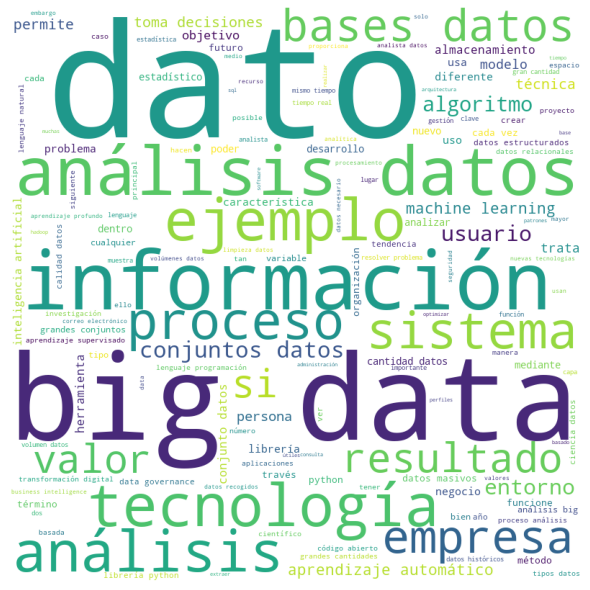

In [14]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 2.2. Word cloud aplicando una máscara de contorno

Ahora vamos a generar una nube de palabras pero que se adapte a una imagen "contorno". Para ello, lo ideal es contar con una imagen en blanco y negro en formato PNG.

NOTA: WordCloud rellenará aquellos espacios que NO estén de color blanco. Hay que tener cuidado con imágenes PNG con el fondo transparente, primero debemos incluir un fondo blanco.

In [15]:
#Función para transformar todas las imágenes PNG con fondo transparente a fondo blanco

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask

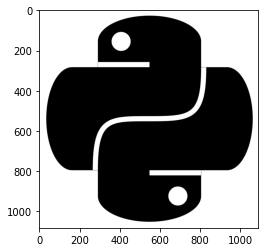

In [16]:
#En caso de que NO tengas que realizar este paso intermedio, directamente creamos la máscara con la imagen PNG con fondo blanco:

image = Image.open("python.png") #Aquí el path

plt.imshow(image)

mask = np.array(image)

¡Ya solo tendremos que agregar la variable "mask" a la clase WordCloud y listo! En mi caso me he descargado la imagen de https://www.clipartkey.com/

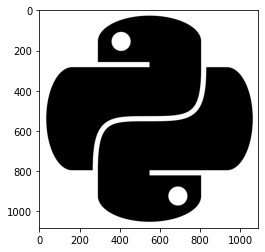

In [17]:
mask = transform_white_backgroud("python.png")

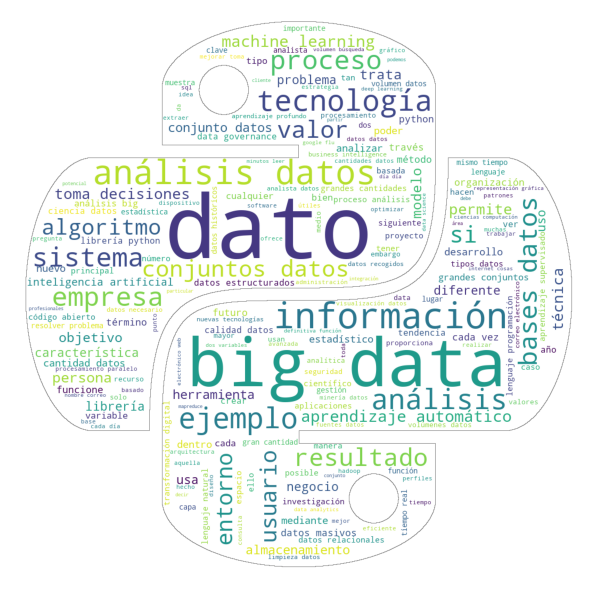

In [18]:
word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='grey', max_words=200, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("./img/python.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 2.3. Word cloud aplicando una máscara de contorno y los colores de la máscara

Por último, vamos a ver el ejemplo de utilizar una máscara con colores y que el texto de la nube de palabras utilice esos mismos colores para la tipografía:

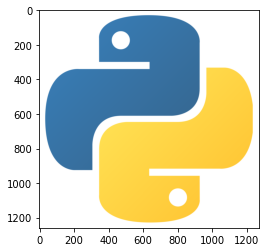

In [19]:
mask = transform_white_backgroud("python_color.png")

image_colors = ImageColorGenerator(mask) #Generamos los colores de la propia máscara

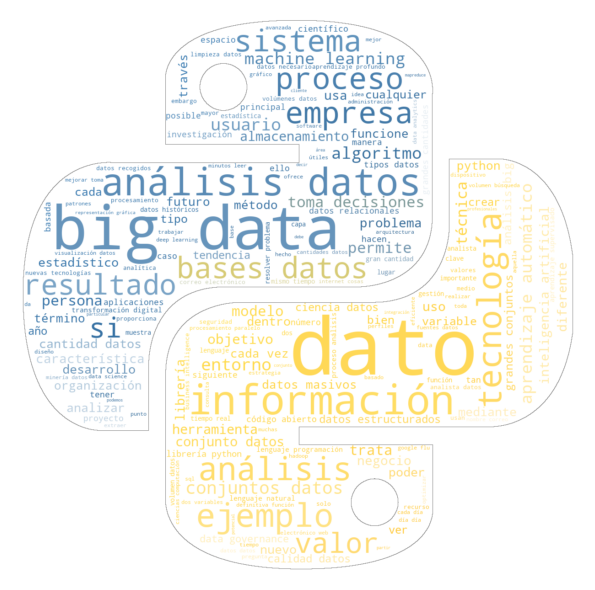

In [22]:
word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='grey', max_words=200, min_font_size=5, collocation_threshold=10).generate(clean_texto)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.tight_layout(pad=0)

plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation="bilinear") #Recoloreamos la nube de palabras

word_cloud.to_file("./img/python_color.png") #Guardamos la imagen generada DESPUÉS DE QUE SEA RECOLOREADA

plt.show()

**Antonio Fernández Troyano**